# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#starting URL for weather map API call
url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}'
print(url)

#list of city data
city_data = []

#print to logger
print("Beginning Data Retrieval")
print("-" *15)

#create counters 
record_count = 1
set_count = 1

#loop through all cities in list
for index, city in enumerate(cities):
    #group cities in sets of 50 for logging purpose 
    if(index % 50 == 0 and index >=50):
        set_count += 1
        record_count = 0
    #create endpoint for the URL with each city 
    city_url = url + "&q=" + city
    
    #log the url record and set number 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count +=1
    
    #run API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #extract out max temp humidity and cloudiness 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #append city info into city data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    
    except:
        print("City not found. Skipping...")
        pass

#indicate data loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fea9a523c49d8e3adc5047bebc815d4a
Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | aguimes
Processing Record 2 of Set 1 | meulaboh
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | paramonga
Processing Record 5 of Set 1 | broome
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | salinopolis
Processing Record 16 of Set 1 | tabou
Processing Record 17 of Set 1 | winnemucca
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | harnosand
Process

Processing Record 36 of Set 4 | kirakira
Processing Record 37 of Set 4 | leningradskiy
Processing Record 38 of Set 4 | camopi
Processing Record 39 of Set 4 | bethel
Processing Record 40 of Set 4 | sabae
Processing Record 41 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 42 of Set 4 | hit
Processing Record 43 of Set 4 | sarnia
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | parsabad
Processing Record 46 of Set 4 | bubaque
Processing Record 47 of Set 4 | nome
Processing Record 48 of Set 4 | srednekolymsk
Processing Record 49 of Set 4 | abha
Processing Record 0 of Set 5 | edd
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | boa vista
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | araouane
Processing Record 6 of Set 5 | hudson bay
Processing Record 7 of Set 5 | samarai
Processing Record 8 of Set 5 | mahalapye
Processing Record

Processing Record 27 of Set 8 | thai binh
Processing Record 28 of Set 8 | puerto narino
Processing Record 29 of Set 8 | kapoeta
Processing Record 30 of Set 8 | esperance
Processing Record 31 of Set 8 | prince george
Processing Record 32 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 33 of Set 8 | kharan
Processing Record 34 of Set 8 | chagda
City not found. Skipping...
Processing Record 35 of Set 8 | karamea
City not found. Skipping...
Processing Record 36 of Set 8 | saint-michel-des-saints
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | saint-lo
Processing Record 39 of Set 8 | krasnyy kut
Processing Record 40 of Set 8 | agadez
Processing Record 41 of Set 8 | upernavik
Processing Record 42 of Set 8 | amapa
Processing Record 43 of Set 8 | la concepcion
Processing Record 44 of Set 8 | shelburne
Processing Record 45 of Set 8 | chongoyape
Processing Record 46 of Set 8 | maumere
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8

Processing Record 9 of Set 12 | cartagena
Processing Record 10 of Set 12 | novopavlovka
Processing Record 11 of Set 12 | tete
Processing Record 12 of Set 12 | tjome
Processing Record 13 of Set 12 | alta floresta
Processing Record 14 of Set 12 | tilichiki
Processing Record 15 of Set 12 | deskati
Processing Record 16 of Set 12 | jolalpan
Processing Record 17 of Set 12 | ust-nera
Processing Record 18 of Set 12 | galveston
Processing Record 19 of Set 12 | jimo
Processing Record 20 of Set 12 | shimoda
Processing Record 21 of Set 12 | omboue
Processing Record 22 of Set 12 | vila velha
Processing Record 23 of Set 12 | yulara
Processing Record 24 of Set 12 | norden
Processing Record 25 of Set 12 | aporawan
City not found. Skipping...
Processing Record 26 of Set 12 | rapid city
Processing Record 27 of Set 12 | isla mujeres
Processing Record 28 of Set 12 | touros
Processing Record 29 of Set 12 | pochutla
Processing Record 30 of Set 12 | praia
Processing Record 31 of Set 12 | phan rang
City not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
#conert array of JSON into pandas
city_data_df = pd.DataFrame(city_data)

#extract relevant fields from data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label = "City_ID")

city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [43]:
# display city data frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aguimes,27.91,-15.45,69.01,31,0,9.17,ES,1579405367
1,meulaboh,4.14,96.13,81.50,79,9,6.51,ID,1579405367
2,punta arenas,-53.15,-70.92,51.80,62,75,18.34,CL,1579405367
3,paramonga,-10.67,-77.83,69.08,90,81,7.02,PE,1579405367
4,broome,42.25,-75.83,33.01,79,90,10.29,US,1579405368


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

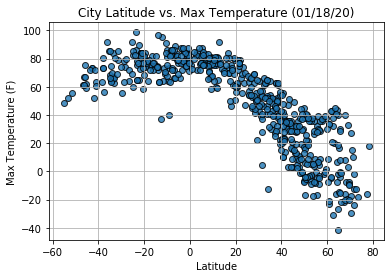

In [44]:
#build scatter plot for latitutde vs temp 
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

#incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure 
plt.savefig("output_data/Fig1.png")
          
plt.show()

#### Latitude vs. Humidity Plot

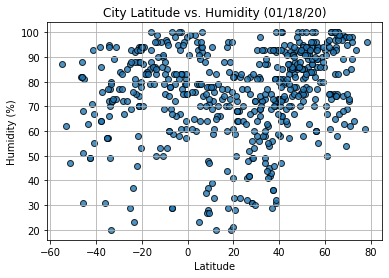

In [45]:
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

#incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%s)' % time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure 
plt.savefig("output_data/Fig2.png")
          
plt.show()

#### Latitude vs. Cloudiness Plot

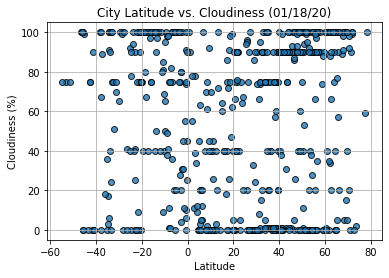

In [46]:
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

#incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure 
plt.savefig("output_data/Fig3.png")
          
plt.show()

#### Latitude vs. Wind Speed Plot

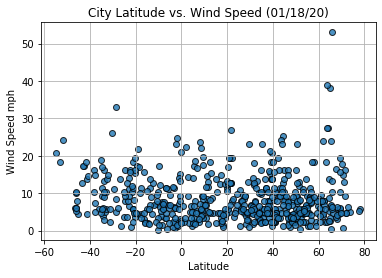

In [47]:
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

#incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime("%x"))
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.grid(True)

#save figure 
plt.savefig("output_data/Fig4.png")
          
plt.show()

## Linear Regression

In [48]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    #run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = 'y = ' + str(round(slope,2)) + "x" +str(round(intercept, 2))
    
    #plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    
    plt.show()

In [49]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8493784132563819


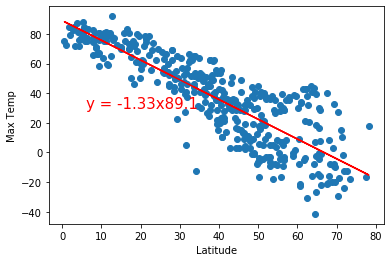

In [50]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.40530443432065455


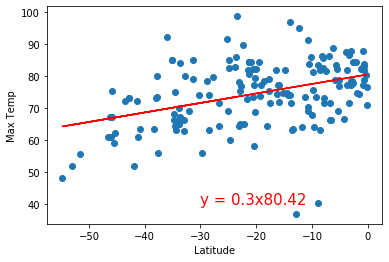

In [51]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35257508941316884


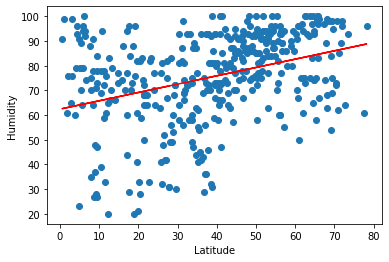

In [52]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21151227380631443


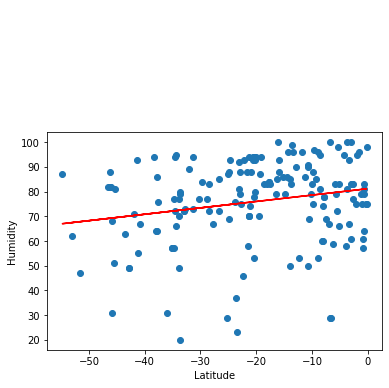

In [53]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30162503951745745


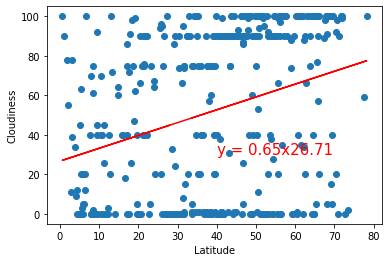

In [54]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (40,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008232199372376662


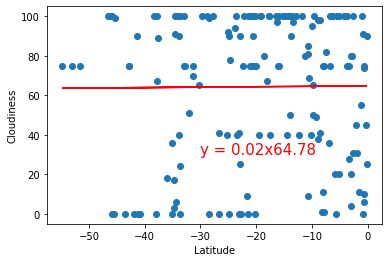

In [55]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.039629374942482705


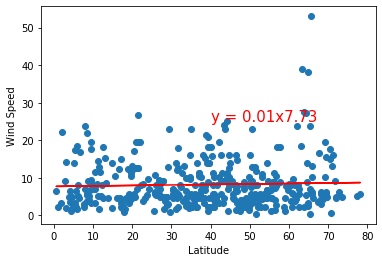

In [56]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2694270867538995


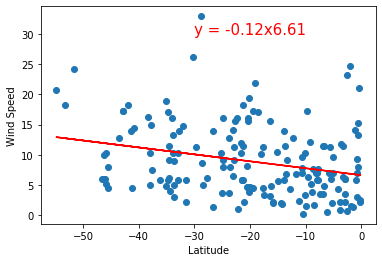

In [57]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (-30,30))